# Retail Analytics and Customer Profiling
- Ifeoma Augusta Adigwe

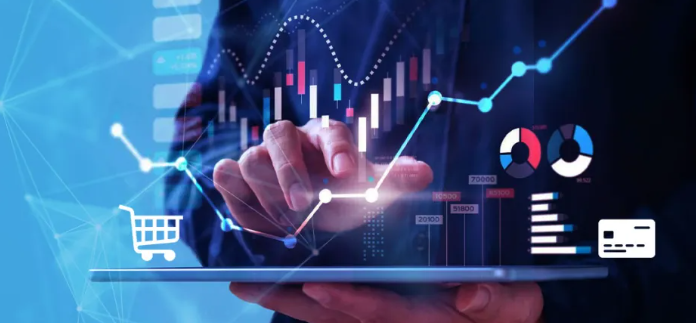

#### Introduction

- The "Customer Analysis" dataset is a comprehensive collection of information encompassing 286,392 rows and 36 columns. This dataset has been meticulously curated to provide valuable insights and aid stakeholders in making informed decisions. By delving into the various aspects of this dataset, businesses can gain a deeper understanding of their customers' interactions, preferences, and behavior.

- The dataset includes essential information related to customer orders and transactions. Some of the key columns present in the dataset include "order_id," "order_date," "status," "item_id," "sku," "qty_ordered," "price," "value," "discount_amount," and "total." These columns provide intricate details about the orders, products, quantities, prices, discounts, and overall transaction values.

- Additionally, the dataset also contains demographic information such as "SSN," "Phone No.," "Place Name," "County," "City," "State," "Zip," and "Region." These attributes enable a comprehensive understanding of the geographical distribution of customers and the markets they belong to.

- The dataset is designed to facilitate deeper customer analysis, providing stakeholders with the means to explore customer trends, preferences, and behavior. By leveraging this dataset, businesses can uncover valuable insights that can drive strategic decisions, such as refining marketing strategies, optimizing inventory management, and tailoring customer experiences.

#### Objective
- Whether seeking to understand buying patterns, identify high-value customers, or improve customer engagement, the "Customer Analysis" dataset serves as a valuable tool for businesses to uncover meaningful patterns and trends within their customer base. The diversity of information and the depth of insights available in this dataset can guide stakeholders towards data-driven solutions and enhance their overall understanding of customer interactions.


In [1]:
# Install viola for 
#!pip install ipywidgets

In [2]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from ipywidgets import interact
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import the first dataset

df = pd.read_csv(r'C:\Users\IfeomaAugustaAdigwe\Desktop\DATASETS Pool\customer_analysis.csv')
df.head(2)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [5]:
df.tail(2)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
286390,100562384,2021-09-30,cod,905202.0,WOFNIG5B4D7EB0E9FDD-L,2.0,49.9,49.9,0.0,49.9,...,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286391,100562386,2021-09-30,processing,905205.0,MATHUA5AF70A7D1E50A,2.0,3559.9,3559.9,0.0,3559.9,...,320-11-8748,423-276-2699,Knoxville,Knox,Knoxville,TN,37920,South,reschlosser,0.0


In [6]:
print(df.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [8]:
df.describe(include = 'all')

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
count,286392.0,286392,286392,286392.000000,286392,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,...,286392,286392,286392,286392,286392,286392,286392.000000,286392,286392,286392.000000
unique,201716.0,365,13,NaN,47932,NaN,NaN,NaN,NaN,NaN,...,64146,64248,15892,2551,15892,51,NaN,4,64006,NaN
top,100476608.0,2020-12-20,canceled,NaN,MATSAM59DB75ADB2F80,NaN,NaN,NaN,NaN,NaN,...,668-48-2887,217-861-7640,Dekalb,Jefferson,Dekalb,TX,NaN,South,jugonzalez,NaN
freq,43.0,13678,112166,NaN,3775,NaN,NaN,NaN,NaN,NaN,...,2524,2524,2525,3510,2525,17510,NaN,103482,2524,NaN
mean,NaN,NaN,NaN,741664.902131,NaN,3.011296,851.385253,885.879934,70.039427,815.840507,...,NaN,NaN,NaN,NaN,NaN,NaN,49723.160015,NaN,NaN,6.069079
std,NaN,NaN,NaN,95746.031827,NaN,4.573837,1741.750751,2073.252179,256.880870,1983.580302,...,NaN,NaN,NaN,NaN,NaN,NaN,27597.198873,NaN,NaN,10.100100
min,NaN,NaN,NaN,574769.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,659684.500000,NaN,2.000000,49.900000,49.900000,0.000000,49.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,26571.750000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,742309.000000,NaN,2.000000,119.000000,158.970000,0.000000,149.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,49316.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,826124.250000,NaN,3.000000,950.000000,910.000000,18.383050,800.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,72645.000000,NaN,NaN,11.000000


In [9]:
partially_empty_columns = df.columns[df.isna().any()]
print(partially_empty_columns)

Index([], dtype='object')


In [10]:
#df.isnull().sum()

['F' 'M']


In [12]:
# To check the actually values in the column

column_name = df['age'].tolist()
#print(column_name[:200])

# Data Cleaning!!!

In [13]:
# The columns 'Gender' contain values ('F' and 'M'), replace 'F' with 'Female' and 'M' with 'Male'

column_gender = ['Gender']

for column in column_gender:
    df[column] = df[column].replace('F', 'Female')
    df[column] = df[column].replace('M', 'Male')


In [14]:
# Change data type of the Order date

df['Order_date'] = pd.to_datetime(df['order_date'])

# Exploratory Data Analysis!

In [15]:
total_male = df['Gender'].value_counts()['Male']
total_female = df['Gender'].value_counts()['Female']
print(f'Total Male: {total_male}')
print(f'Total Female: {total_female}')

Total Male: 146184
Total Female: 140208


In [16]:
total_customers = df['order_id'].nunique()
total_customers

201716

In [17]:
total_qty_ordered = df['qty_ordered'].count()
total_qty_ordered

286392

In [18]:
total_revenue = df['value'].sum()
total_revenue

253708926.07399994

In [19]:
total_profit =df['total'].sum()
total_profit

233650194.43208995

### Total Revenue, profits, and quantity sold for each category and sku

In [20]:
# Group by category and sku, then use agg to get the values of quant_ordered, profit and revenue

product_analysis = df.groupby(['sku', 'category']).agg({'qty_ordered': 'sum', 'total': 'sum', 'value': 'sum', 'discount_amount': 'sum'}).reset_index()
product_analysis

,sku,category,qty_ordered,total,value,discount_amount
0,jjp_15000006-100-NIL,Beauty & Grooming,2.0,328.5,328.5,0.0
1,4U_Service_22,Mobiles & Tablets,3.0,112.0,112.0,0.0
2,4U_Service_36,Mobiles & Tablets,2.0,21.6,21.6,0.0
3,4U_Service_7,Mobiles & Tablets,2.0,62.5,62.5,0.0
4,7CF5AFBC3B16A32A,Superstore,11.0,359.0,359.0,0.0
...,...,...,...,...,...,...
47927,xiaomi_mi-c3-32gb-Grey,Mobiles & Tablets,6.0,4350.0,4350.0,0.0
47928,zaffiro_Z-P-018,Beauty & Grooming,2.0,333.6,333.6,0.0
47929,zaffiro_Z-P-026,Beauty & Grooming,2.0,179.0,179.0,0.0
47930,zaffiro_Z-P-059,Beauty & Grooming,4.0,1246.8,1246.8,0.0


### Products with the highest orders

In [21]:
top_sales_products = product_analysis.sort_values(by='qty_ordered', ascending=False).head(10)
top_sales_products

,sku,category,qty_ordered,total,value,discount_amount
35039,OTHOTH5A0945D0A72F4,Others,9762.0,3.960110e+03,4006.5,4.639000e+01
20528,KNO59D64DAF36939,Superstore,8726.0,2.059181e+04,22038.6,1.446790e+03
23927,MATSAM59DB75ADB2F80,Mobiles & Tablets,8194.0,4.972349e+06,6098198.6,1.125850e+06
37258,VIT5ABCCF7FDF973,Superstore,6141.0,3.467237e+05,417454.5,7.073081e+04
20527,KNO59D64DAC18B6C,Superstore,5358.0,1.237558e+04,13443.4,1.067821e+03
2216,APPNAT5A0A01860CE92,Appliances,3592.0,1.708366e+05,201743.7,3.090708e+04
6516,BAGLUX5A099F4E3D5CF,Beauty & Grooming,3404.0,5.203284e+04,65667.0,1.363416e+04
24149,MATSAM5A7463EE3C1A5,Mobiles & Tablets,2645.0,2.107339e+06,2490003.5,3.826640e+05
35210,OTHPCB5AB351EF2864B,Others,2603.0,1.015500e+05,101550.0,0.000000e+00
24778,MATTEL5A462528E403F,Mobiles & Tablets,2565.0,6.318829e+05,771007.3,1.391244e+05


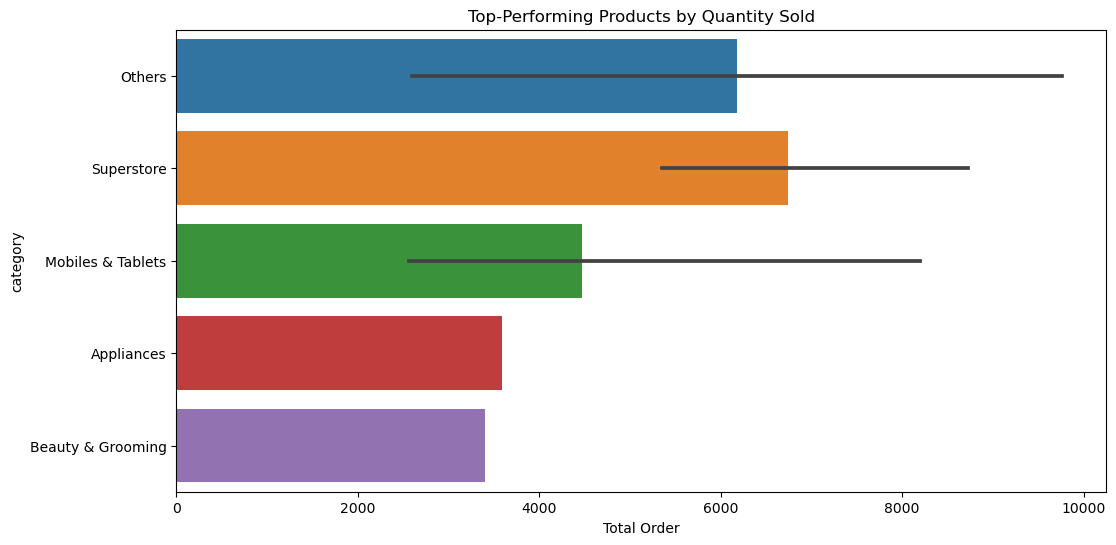

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='qty_ordered', y='category', data=top_sales_products)
plt.title('Top-Performing Products by Quantity Sold')
plt.xlabel('Total Order')
plt.ylabel('category')
plt.show()

### Products with the highest Revenue

In [23]:
## Products that generated most Revenue

top_most_sold_items = df.groupby('category')['value'].sum()
top_most_sold_items = top_most_sold_items.sort_values(ascending=False).head(10)
top_most_sold_items

# OR 
#top_most_sold_items = df.groupby('category')['value'].sum().sort_values(ascending=False).head(10)

category
Mobiles & Tablets    1.403984e+08
Appliances           3.344141e+07
Entertainment        3.042948e+07
Others               1.559132e+07
Computing            1.035744e+07
Women's Fashion      7.359614e+06
Men's Fashion        5.163376e+06
Superstore           3.369000e+06
Beauty & Grooming    2.890640e+06
Home & Living        1.918317e+06
Name: value, dtype: float64

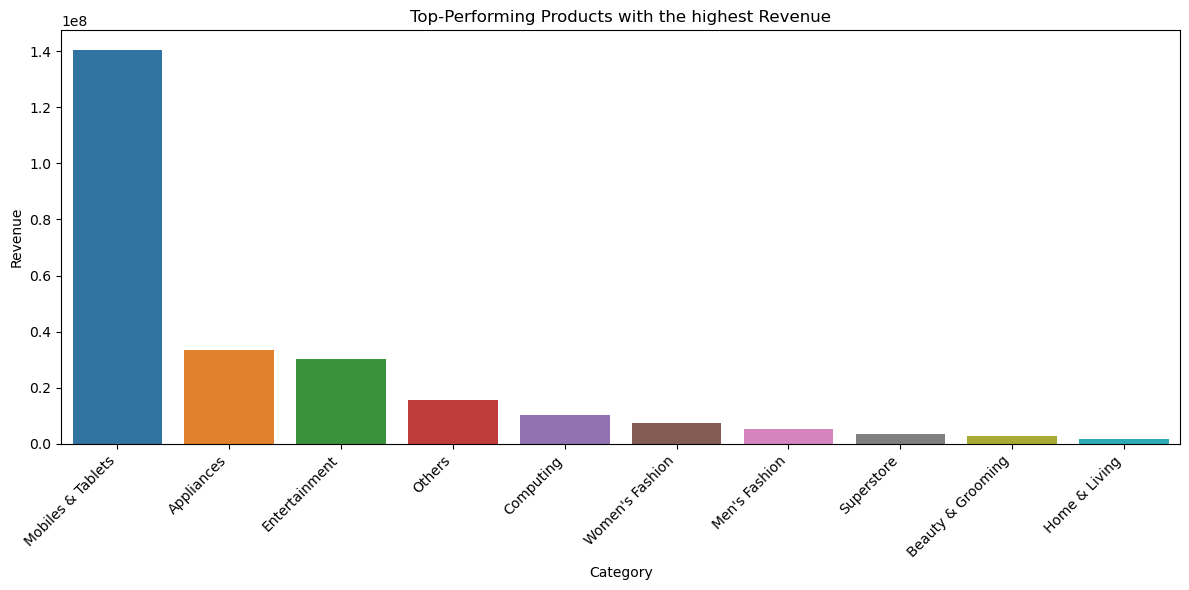

In [24]:

#top_most_sold_items = df.groupby('category')['value'].sum().sort_values(ascending=False).head(10)
top_most_sold_items_df = top_most_sold_items.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='value', data=top_most_sold_items_df)
plt.title('Top-Performing Products with the highest Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Top-Performing Products with the highest profit

In [25]:
#top_profit_items

top_profit_items = df.groupby('category')['total'].sum().sort_values(ascending=False).head(10)
top_profit_items

category
Mobiles & Tablets    1.301120e+08
Appliances           3.006084e+07
Entertainment        2.713843e+07
Others               1.556433e+07
Computing            9.362343e+06
Women's Fashion      6.649842e+06
Men's Fashion        4.820147e+06
Superstore           2.886907e+06
Beauty & Grooming    2.644748e+06
Home & Living        1.810582e+06
Name: total, dtype: float64

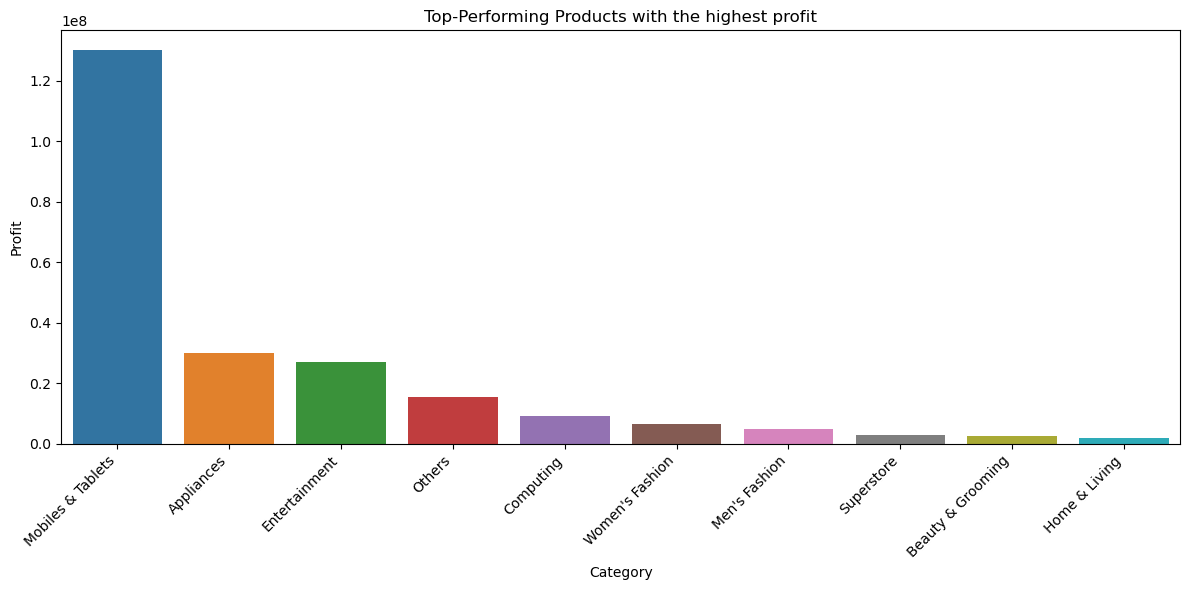

In [26]:
top_profit_items = df.groupby('category')['total'].sum().sort_values(ascending=False).head(10)
top_profit_items_df = top_profit_items.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total', data=top_profit_items_df)
plt.title('Top-Performing Products with the highest profit')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Which products are sold the most?

In [27]:
product_group = df.groupby('category').sum().sort_values(by='qty_ordered', ascending=False).head(20)
product_group

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
category,,,,,,,,,,,,
Mobiles & Tablets,4.580881e+10,135041.0,1.399431e+08,1.403984e+08,1.028639e+07,1.301120e+08,4.520032e+09,124793815,34472619261,2861168.0,3086140459,500345.442577
Others,2.037833e+10,109266.0,6.130726e+06,1.559132e+07,2.698795e+04,1.556433e+07,2.316249e+09,52762275,14647494116,1207220.0,1284539355,7168.903586
Men's Fashion,2.925328e+10,102374.0,3.601289e+06,5.163376e+06,3.432296e+05,4.820147e+06,2.790416e+09,82260906,22659746063,1894136.0,2039620948,149276.641595
Superstore,1.147455e+10,101964.0,1.236994e+06,3.369000e+06,4.820937e+05,2.886907e+06,9.021324e+08,30359205,8653552968,707398.0,747452045,141245.292712
Appliances,2.421267e+10,82435.0,3.855929e+07,3.344141e+07,3.380578e+06,3.006084e+07,2.184645e+09,66746224,18481069525,1535556.0,1641838935,309224.646805
Women's Fashion,2.093250e+10,78944.0,4.524758e+06,7.359614e+06,7.097728e+05,6.649842e+06,1.920844e+09,57252060,15883704092,1313498.0,1362670503,143152.934279
Beauty & Grooming,1.324111e+10,71122.0,1.596178e+06,2.890640e+06,2.458920e+05,2.644748e+06,1.134637e+09,36167223,10064205761,835127.0,882677414,98511.183307
Home & Living,1.015629e+10,41830.0,1.112348e+06,1.918317e+06,1.077350e+05,1.810582e+06,9.119350e+08,28266960,7792148423,644986.0,698019511,63010.969858
Entertainment,1.276071e+10,34788.0,3.454436e+07,3.042948e+07,3.291045e+06,2.713843e+07,1.227978e+09,35061016,9797968457,803185.0,878262616,168922.688309


In [28]:
# Total profit generated by product category

profit_by_product = df.groupby('category').sum()['total'].sort_values(ascending=False).head(15)
#profit_by_product

In [29]:
# Total Revenue generated by product category

sales_by_product = df.groupby('category').sum()['value'].sort_values(ascending=False).head(15)
#sales_by_product

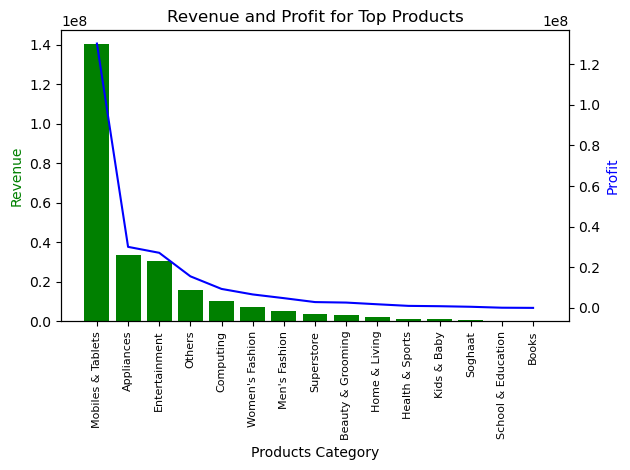

In [30]:
# Compare the Product Category with Revenue and Profit on a Bar chart

sales_by_product = df.groupby('category').sum()['value'].sort_values(ascending=False).head(15)

fig, ax1 = plt.subplots()

profit_by_product = df.groupby('category').sum()['total'].sort_values(ascending=False).head(15)

# Plot Sales using the first y-axis (ax1)
ax1.bar(sales_by_product.index, sales_by_product.values, color='g')
ax1.set_xlabel('Products Category')
ax1.set_ylabel('Revenue', color='g')

# Create a twin y-axis (ax2) for Profit and plot it using a line chart
ax2 = ax1.twinx()
ax2.plot(profit_by_product.index, profit_by_product.values, 'b-')
ax2.set_ylabel('Profit', color='b')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(sales_by_product.index, rotation='vertical', size=8)

plt.title('Revenue and Profit for Top Products')

plt.tight_layout()
plt.show()


### Revenue Generated Monthly

In [31]:
df['Order_month'] = df['Order_date'].dt.month   # # Extract the month from 'order_date

# Group by month and calculate total revenue
revenue_by_month = df.groupby('Order_month')['value'].sum()
revenue_by_month

Order_month
1     7.355843e+06
2     4.558016e+06
3     2.759086e+07
4     3.985278e+07
5     1.037626e+07
6     2.656832e+07
7     1.940050e+07
8     2.061968e+07
9     1.199688e+07
10    5.507426e+06
11    1.345442e+07
12    6.642794e+07
Name: value, dtype: float64

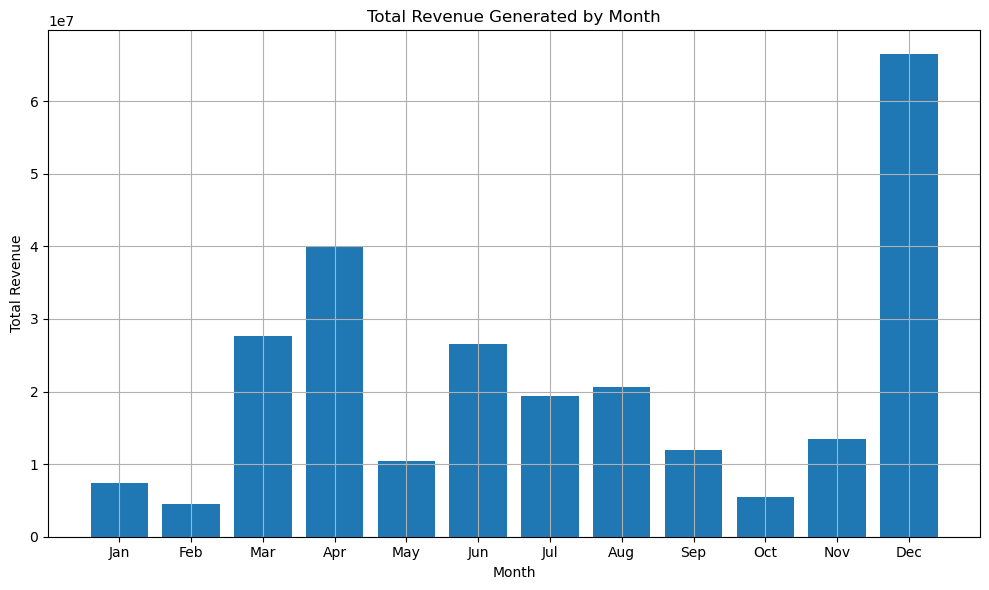

In [32]:
# Group by month and calculate total revenue
revenue_by_month = df.groupby('Order_month')['value'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_month.index, revenue_by_month.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()

plt.show()


### What is the Trend of Orders by years

In [33]:
# Group the order date by month and count the total number of orders by year

order_trends = df.groupby(df['Order_date'].dt.to_period('M')).size() 
order_trends

Order_date
2020-10     9287
2020-11    17364
2020-12    82528
2021-01    17212
2021-02    10141
2021-03    26852
2021-04    42138
2021-05    14815
2021-06    26804
2021-07    15340
2021-08    11428
2021-09    12483
Freq: M, dtype: int64

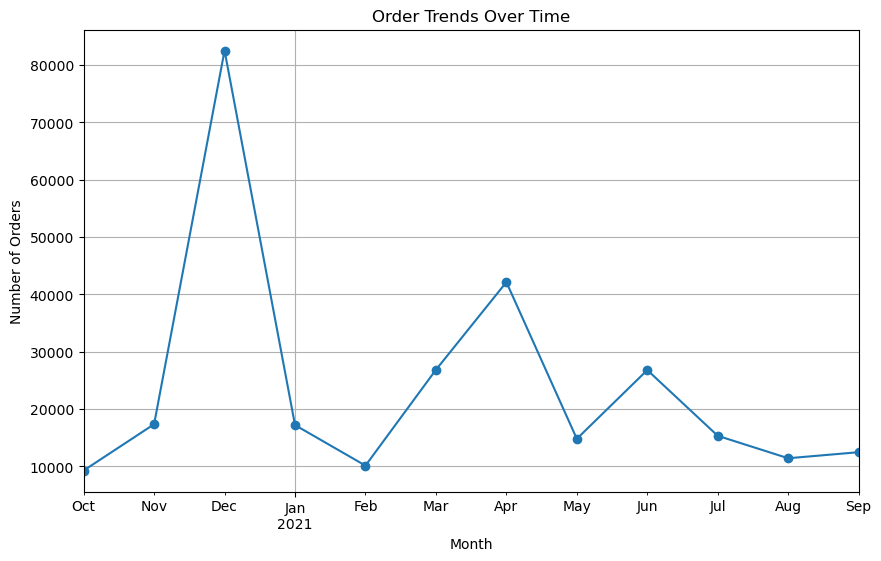

In [34]:
plt.figure(figsize=(10, 6))
order_trends.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Order Trends Over Time')
plt.grid(True)
plt.show()


### Revenue based on Age

In [35]:
# Group the age to Age-groups

df['Age_group'] = np.where(df['age'] <= 28, 'Young', 
                        np.where(df['age'] <= 38, 'Young_Adults',
                                 np.where(df['age'] <= 48, 'Middle_Age',
                                          np.where(df['age'] <= 58, 'Mid_life',
                                                   np.where(df['age'] <= 68, 'Elderly','Senior')))))

#print(df['Age_group'])

In [36]:
# Revenue generated by Age_group

average_revenue_by_agegroup = df.groupby('Age_group')['value'].mean().reset_index()
average_revenue_by_agegroup

,Age_group,value
0,Elderly,875.111459
1,Mid_life,810.890358
2,Middle_Age,973.649603
3,Senior,892.489555
4,Young,864.715826
5,Young_Adults,908.814691


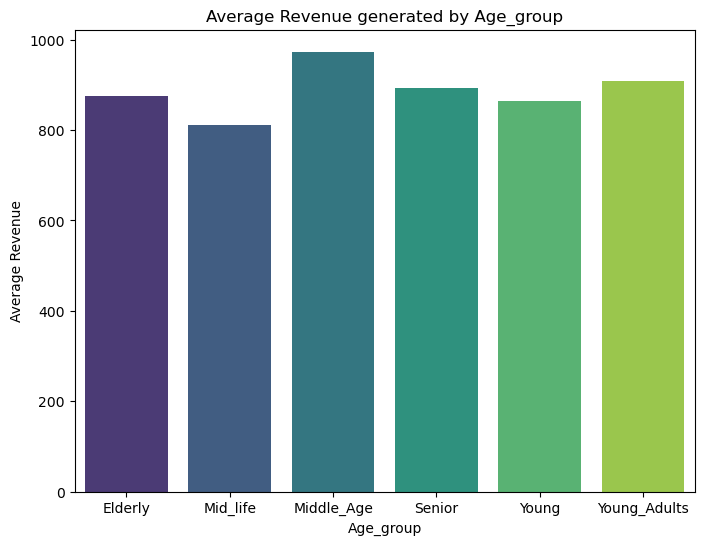

In [37]:
# Average Revenue generated by Age_group

average_revenue_by_agegroup = df.groupby('Age_group')['value'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_group', y='value', data=average_revenue_by_agegroup, palette='viridis')
plt.xlabel('Age_group')
plt.ylabel('Average Revenue')
plt.title('Average Revenue generated by Age_group')
plt.show()

In [38]:
# Group by category and gender, then calculate the sum of quantity ordered
quantity_by_category_gender = df.groupby(['category', 'Gender'])['qty_ordered'].sum().reset_index()

# Sort the data by quantity ordered in descending order
quantity_by_category_gender = quantity_by_category_gender.sort_values(by='qty_ordered', ascending=False).head(10)

print(quantity_by_category_gender)


             category  Gender  qty_ordered
19  Mobiles & Tablets    Male      68071.0
18  Mobiles & Tablets  Female      66970.0
21             Others    Male      58025.0
27         Superstore    Male      55544.0
17      Men's Fashion    Male      52842.0
20             Others  Female      51241.0
16      Men's Fashion  Female      49532.0
26         Superstore  Female      46420.0
1          Appliances    Male      42277.0
29    Women's Fashion    Male      41387.0


### Gender by Category and Quantity Ordered

In [39]:
# Group by category and gender, then calculate the sum of quantity ordered
quantity_by_category_gender = df.groupby(['category', 'Gender'])['qty_ordered'].sum().reset_index()
quantity_by_category_gender = quantity_by_category_gender.sort_values(by='qty_ordered', ascending=False).head(30)
#quantity_by_category_gender

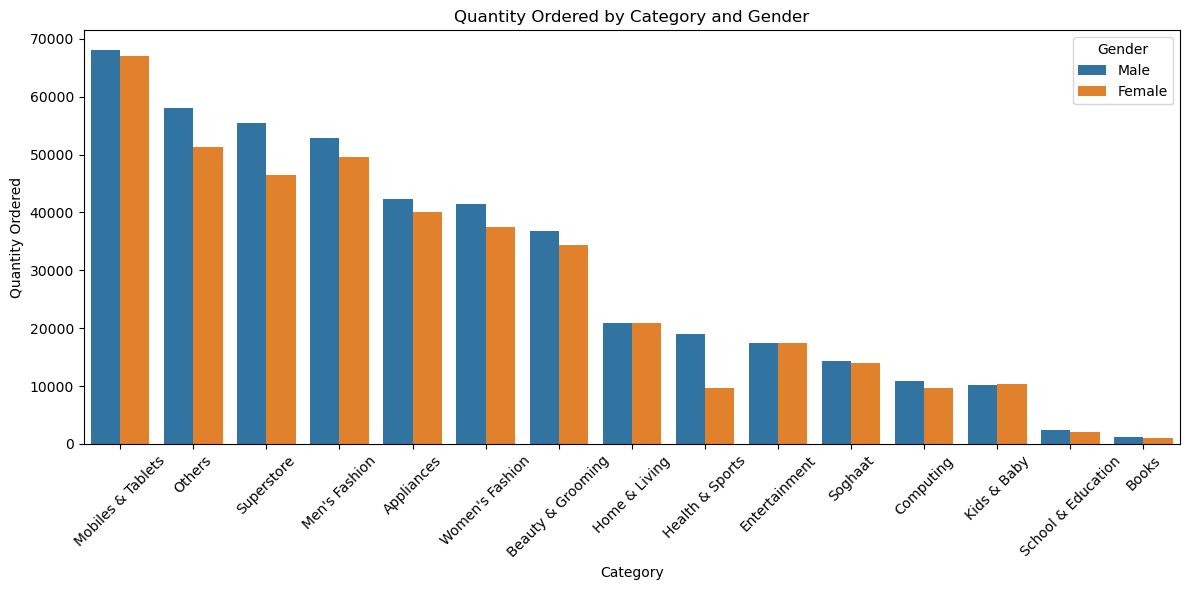

In [40]:

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='qty_ordered', hue='Gender', data=quantity_by_category_gender)
plt.title('Quantity Ordered by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Calculate the profit by Region

In [41]:
# Group by region and calculate the sum of profit

profit_by_region = df.groupby('Region')['value'].sum().reset_index()
profit_by_region = profit_by_region.sort_values(by='value', ascending=False)
profit_by_region

,Region,value
2,South,9.698483e+07
0,Midwest,6.849903e+07
3,West,4.479893e+07
1,Northeast,4.342614e+07


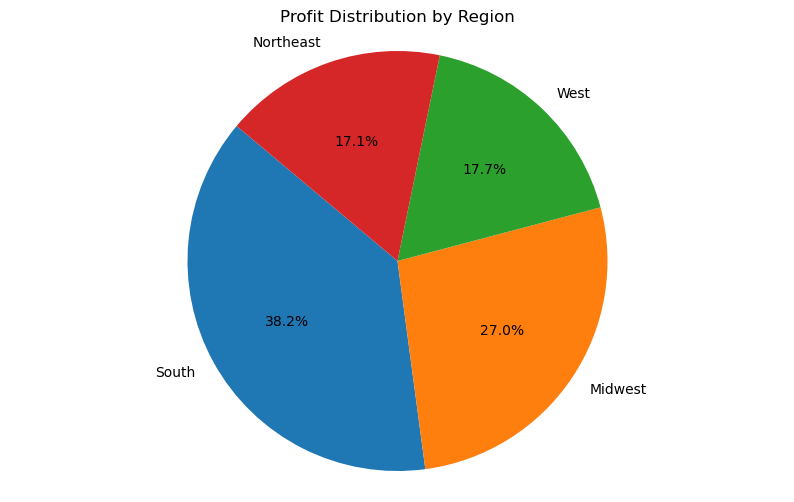

In [42]:
plt.figure(figsize=(10, 6))
plt.pie(profit_by_region['value'], labels=profit_by_region['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


## Geographical Insights analysis

### Calculate the number of customers by location

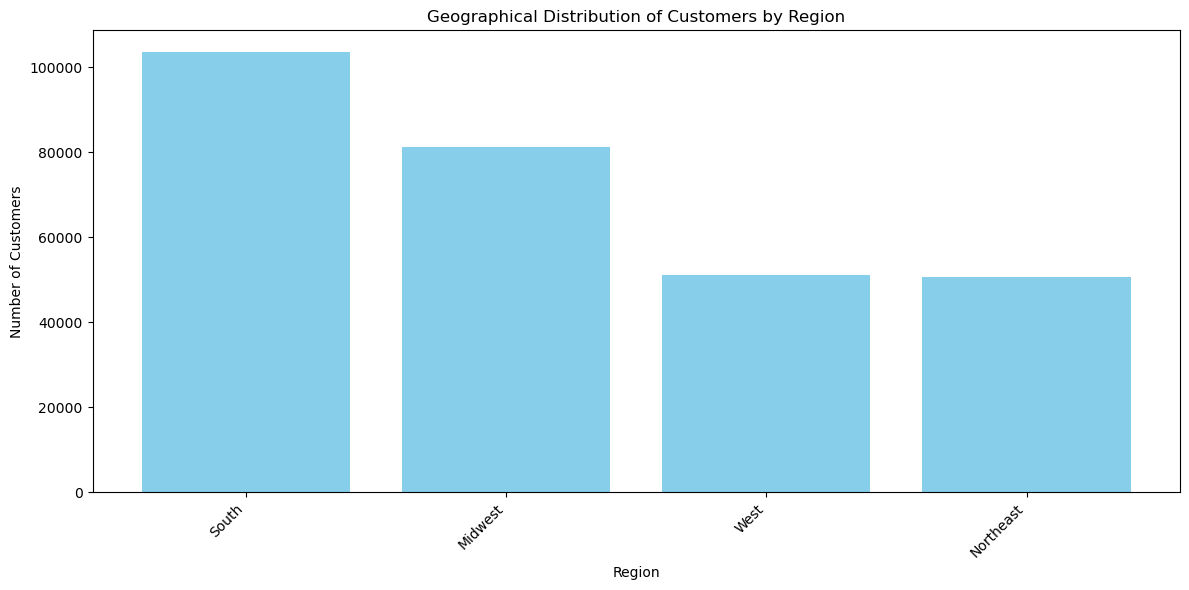

In [43]:
# Number of customers by Region

region_counts = df['Region'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(region_counts.index, region_counts.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Geographical Distribution of Customers by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

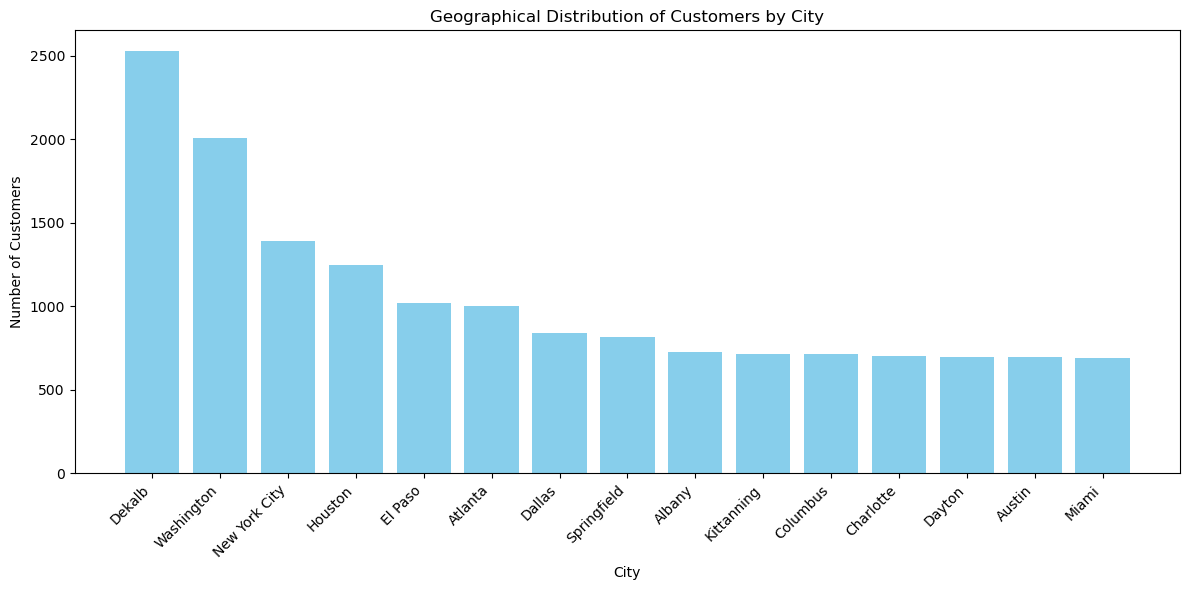

In [44]:
# Number of customers by City

city_counts = df['City'].value_counts()
city_counts = city_counts.sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.bar(city_counts.index, city_counts.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Geographical Distribution of Customers by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

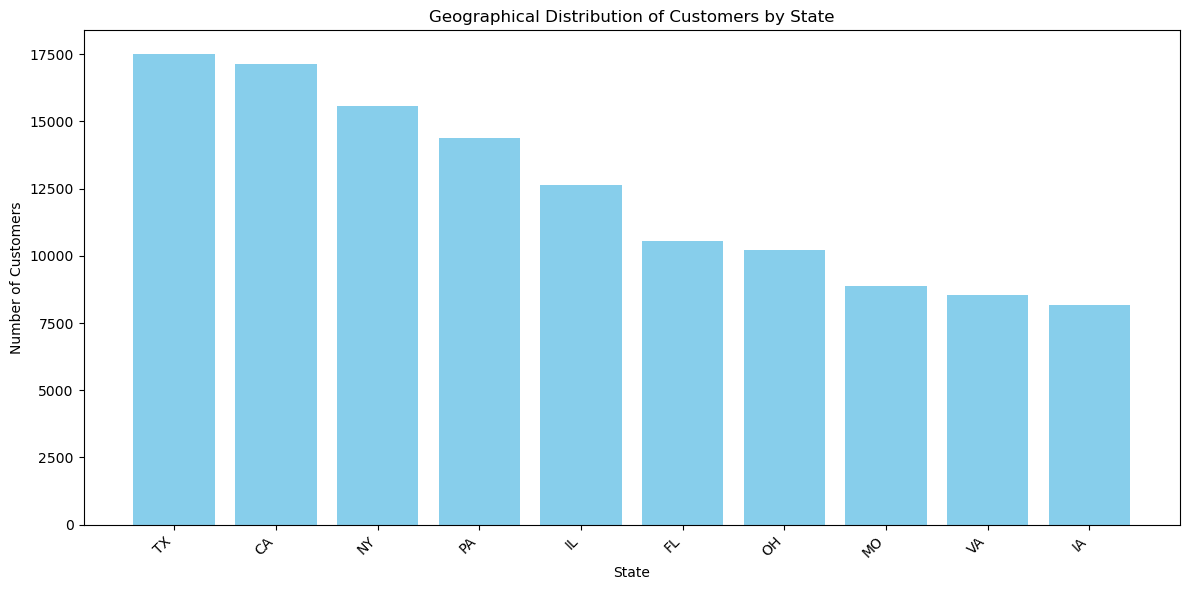

In [45]:
# Number of customers by State

state_counts = df['State'].value_counts()
state_counts = state_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Geographical Distribution of Customers by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()